## Bank Card Fraud Detection - Unsupervised Anomaly Detection

The dataset used for training the model has 284315 non-fraud data points and 492 fraud data points.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing required libraries

In [ ]:
import numpy as np # Library to perform matrix operations more efficiently
import pandas as pd # To convert tabular data into pandas dataframe
import matplotlib.pyplot as plt # Function for plotting graphs
import seaborn as sns # Data visualization library based on matplotlib. 

# scikit-learn
from sklearn.manifold import TSNE # Tool to visualize non-linear high-dimensional data.
from sklearn.model_selection import train_test_split # Split data into random train and test subsets.
from sklearn.ensemble import IsolationForest # To get the anomaly score of each sample using the IsolationForest algorithm.
# from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression # To perform logistic regression.
from sklearn.svm import SVC # To perform support vector classification

# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

# scaling
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.

# autoencoder
import tensorflow as tf # Library for machine learning and artificial intelligence.
from tensorflow import keras # Provides a Python interface for artificial neural networks.

# deep learning
from keras.models import Model, Sequential
from keras import regularizers # For built-in regularizers
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
)
from keras.optimizers import Adam

<IPython.core.display.Javascript object>

## Reading the dataset and running some stats

In [ ]:
# reading the input dataset
df = pd.read_csv("/content/drive/MyDrive/IDRBT/creditcard.csv")

In [ ]:
# checking the number of rows and columns
df.shape

(284807, 31)

In [ ]:
# checking the first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<IPython.core.display.Javascript object>

In [ ]:
# checking for null values
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<IPython.core.display.Javascript object>

In [ ]:
# Print a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<IPython.core.display.Javascript object>

The data types look correct!

In [ ]:
# checking the data stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<IPython.core.display.Javascript object>

## Checking for correlations

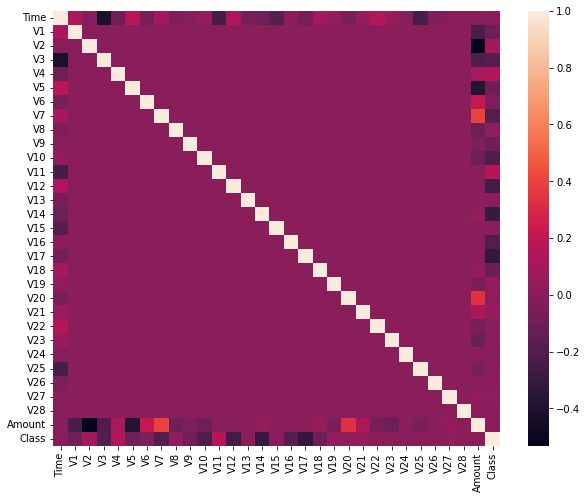

<IPython.core.display.Javascript object>

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.show()

The correlation plot shows no presence of multi collinearity amongst V1 to V28 features (PCA components). Some of these features does show high correlation with the target class (Class) and independent features - Time and Amount. The target class does not seem to have any correlation with Time and Amount.

## Unsupervised Machine Learning Techniques for Anomaly Detection

In [ ]:
# Since the dataset is too large, taking a sample from that data to train models
sampled_data = df.sample(frac=0.1, random_state=42)

print("Sampled Data Shape:", sampled_data.shape)

Sampled Data Shape: (28481, 31)
Target Class Value Count: 
0    28435
1       46
Name: Class, dtype: int64


<IPython.core.display.Javascript object>

In [ ]:
# splitting data into X and y

X = sampled_data.drop("Class", axis=1)
y = sampled_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)
print("========================================")
print("Target Class Value Count: ")
print("Normal Class: ", (y == 0).sum())
print("Fraud Class: ", (y == 1).sum())

fraud = sampled_data[sampled_data["Class"] == 1]
non_fraud = sampled_data[sampled_data["Class"] == 0]

outlier_fraction = len(fraud) / float(len(non_fraud))
print("========================================")
print("Fraud Fraction: ", outlier_fraction)

X Shape:  (28481, 30)
y Shape:  (28481,)
Target Class Value Count: 
Normal Class:  28435
Fraud Class:  46
Fraud Fraction:  0.001617724635132759


<IPython.core.display.Javascript object>

## 1. Isolation Forest (Unsupervised Outlier Detection)
Isolation tree is an unsupervised algorithm and therefore it does not need labels to identify the outlier/anomaly. It follows the following steps: Random and recursive partition of data is carried out, which is represented as a tree (random forest).

In [ ]:
clf = IsolationForest(n_estimators=100, max_samples=len(X), random_state=42, contamination=outlier_fraction)

clf.fit(X)
y_pred = clf.predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred[y_pred == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred[y_pred == 1]))
print("=======================================================")

# replacing -1 by 1 and 1 by 0
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# evaluation
print("Number of misclassified data points: ", (y_pred != y).sum())
print("\nAccuracy Score :", accuracy_score(y, y_pred))

print("\nClassification Report: ")
print(classification_report(y, y_pred))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Predicted Anomalous Data Points:  47
Predicted Non Anomalous Data Points:  28434
Number of misclassified data points:  63

Accuracy Score : 0.9977879990168884

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.32      0.33      0.32        46

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481



<IPython.core.display.Javascript object>

In [ ]:
# adding the predicted y to the sampled dataset
sampled_data["y_pred_iso"] = y_pred
print(sampled_data["y_pred_iso"].value_counts())

0    28434
1       47
Name: y_pred_iso, dtype: int64


<IPython.core.display.Javascript object>

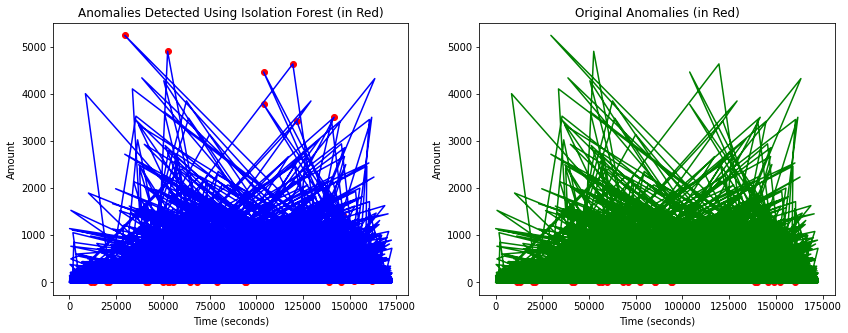

<IPython.core.display.Javascript object>

In [ ]:
# plotting normal and fraud data points

fig = plt.figure(figsize=(14, 5))

# Isolation Forest Plot
plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred_iso"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using Isolation Forest (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

# Original data plot
plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.show()

## 2. Local Outlier Factor (Unsupervised Outlier Detection)
n_neighbors: int, default=20 Number of neighbors to use by default for kneighbors queries. If n_neighbors is larger than the number of samples provided, all samples will be used.

leaf_size: int, default=30 Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

metric: str or callable, default=’minkowski’ metric used for the distance computation. Any metric from scikit-learn or scipy.spatial.distance can be used.

p: int, default=2 Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm="auto",
    leaf_size=30,
    metric="minkowski",
    p=2,
    metric_params=None,
    contamination=outlier_fraction,
)

y_pred_lof = lof.fit_predict(X)

print("Predicted Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == 1]))
print("================================================================")


# replacing -1 by 1 and 1 by 0
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

# evaluation
print("Number of misclassified data points: ", (y_pred_lof != y).sum())
print("\nAccuracy Score :", accuracy_score(y, y_pred_lof))

print("\nClassification Report: ")
print(classification_report(y, y_pred_lof))

Predicted Anomalous Data Points:  47
Predicted Non Anomalous Data Points:  28434
Number of misclassified data points:  91

Accuracy Score : 0.9968048874688389

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.02      0.02      0.02        46

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<IPython.core.display.Javascript object>

In [ ]:
# adding the predicted y to the sampled dataset
sampled_data["y_pred_lof"] = y_pred_lof
print(sampled_data["y_pred_lof"].value_counts())

0    28434
1       47
Name: y_pred_lof, dtype: int64


<IPython.core.display.Javascript object>

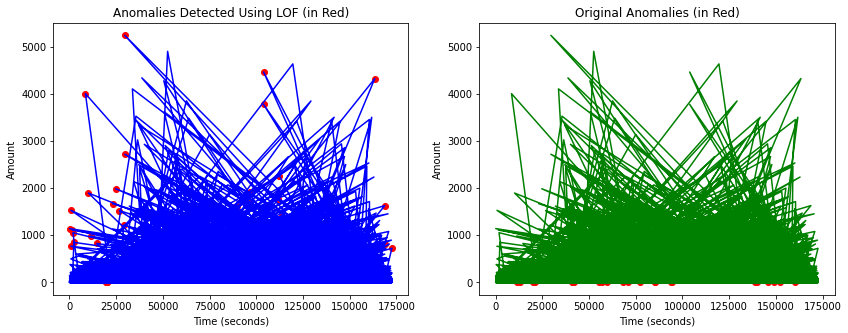

<IPython.core.display.Javascript object>

In [ ]:
# plotting normal and fraud data points

fig = plt.figure(figsize=(14, 5))

# LOF Plot
plt.subplot(1, 2, 1)
anomaly_df = sampled_data.loc[sampled_data["y_pred_lof"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="blue")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Anomalies Detected Using LOF (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

# Original Plot
plt.subplot(1, 2, 2)
anomaly_df = sampled_data.loc[sampled_data["Class"] == 1, ["Time", "Amount"]]
plt.plot(sampled_data["Time"], sampled_data["Amount"], color="green")
plt.scatter(anomaly_df["Time"], anomaly_df["Amount"], color="red")
plt.title("Original Anomalies (in Red)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")

plt.show()

## 3. Deep Learning - AutoEncoders

In [ ]:
# creating a smaller sample for handling imbalanced dataset.

normal_trans = df[df["Class"] == 0].sample(2000)
fraud_trans = df[df["Class"] == 1]
dl_sample_data = normal_trans.append(fraud_trans).reset_index(drop=True)

print("Target Class Value Counts: ")
print(dl_sample_data["Class"].value_counts())

Target Class Value Counts: 
0    2000
1     492
Name: Class, dtype: int64


<IPython.core.display.Javascript object>

In [ ]:
# splitting the data

X = dl_sample_data.drop("Class", axis=1)
y = dl_sample_data["Class"]

print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (2492, 30)
y Shape:  (2492,)


<IPython.core.display.Javascript object>

### Visualize the data with t-SNE
TNSE(t-distributed Stochastic Neighbor Embedding) is one of the dimensionality reduction method other than PCA and SVD. This will supress some noise and speed up the computation of pairwise distance between samples.

In [ ]:
def dimensionality_plot(X, y):

    #     sns.set(style='whitegrid', palette='muted')

    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state=42)

    # Fitting the data
    X_trans = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))

    plt.scatter(
        X_trans[np.where(y == 0), 0],
        X_trans[np.where(y == 0), 1],
        marker="o",
        color="b",
        linewidth=1,
        alpha=0.8,
        label="Normal",
    )

    plt.scatter(
        X_trans[np.where(y == 1), 0],
        X_trans[np.where(y == 1), 1],
        marker="o",
        color="r",
        linewidth=1,
        alpha=0.8,
        label="Fraud",
    )

    plt.legend(loc="best")

    plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


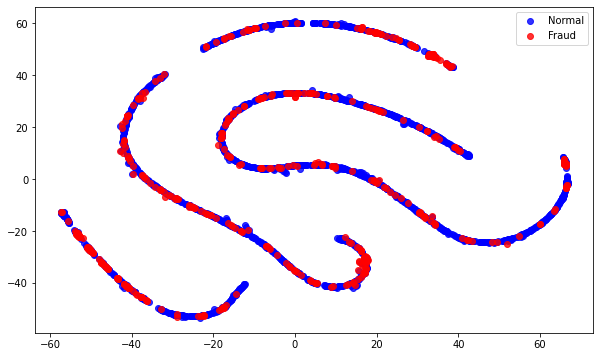

<IPython.core.display.Javascript object>

In [ ]:
# plotting the dimensionality_plot for original data

dimensionality_plot(X, y)

In [ ]:
# scaling the data

scaler = StandardScaler().fit_transform(X)

# scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

<IPython.core.display.Javascript object>

In [ ]:
# setting up the input shape (equal to number of features)
input_layer = Input(shape=(X.shape[1],))

# building the encoder network
encoded = Dense(100, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    input_layer
)
encoded = Dense(50, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(25, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(12, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(
    encoded
)
encoded = Dense(6, activation="relu")(encoded)

# building the decoder network
decoded = Dense(12, activation="tanh")(encoded)
decoded = Dense(25, activation="tanh")(decoded)
decoded = Dense(50, activation="tanh")(decoded)
decoded = Dense(100, activation="tanh")(decoded)

output_layer = Dense(X.shape[1], activation="sigmoid")(decoded)

# creating the model
autoencoder = Model(input_layer, output_layer)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 12)                312       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 12)                84    

<IPython.core.display.Javascript object>

In [ ]:
# compiling the auto encoder model
autoencoder.compile(optimizer="adam", loss="mse")

# training the auto encoder model on non fraud data (we don't need too many observations for model learning in this case)
history = autoencoder.fit(
    X_scaled_normal,
    X_scaled_normal,
    batch_size=32,
    epochs=50,
    shuffle=True,
    validation_split=0.20,
)

Epoch 1/50
50/50 [==============================] - 8s 9ms/step - loss: 0.5523 - val_loss: 0.4142
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4803 - val_loss: 0.3902
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4573 - val_loss: 0.3744
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4466 - val_loss: 0.3671
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4390 - val_loss: 0.3595
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4311 - val_loss: 0.3510
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4241 - val_loss: 0.3451
Epoch 8/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4196 - val_loss: 0.3432
Epoch 9/50
50/50 [==============================] - 0s 5ms/step - loss: 0.4157 - val_loss: 0.3393
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4128 - val_loss: 0.3382
Epoch 11/50
50/50 [

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Loss Curves')

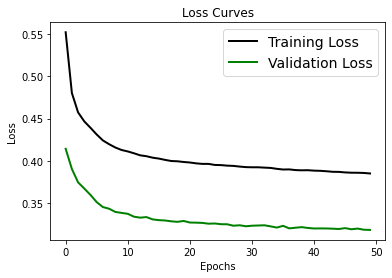

<IPython.core.display.Javascript object>

In [ ]:
# Loss curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "black", linewidth=2.0)
plt.plot(history.history["val_loss"], "green", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

In [ ]:
# creating the sequential model and adding the trainined weights till the fifth layer (till where the latent representation exists)

latent_model = Sequential()
latent_model.add(autoencoder.layers[0])
latent_model.add(autoencoder.layers[1])
latent_model.add(autoencoder.layers[2])
latent_model.add(autoencoder.layers[3])
latent_model.add(autoencoder.layers[4])

<IPython.core.display.Javascript object>

In [ ]:
# generating the hidden representation of the 2 classes

normal_datapoints = latent_model.predict(X_scaled_normal)
fraud_datapoints = latent_model.predict(X_scaled_fraud)

# creating a dataframe of latent representation of the data

encoded_X = np.append(normal_datapoints, fraud_datapoints, axis=0)

y_normal = np.zeros(normal_datapoints.shape[0])
y_fraud = np.ones(fraud_datapoints.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)

16/16 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


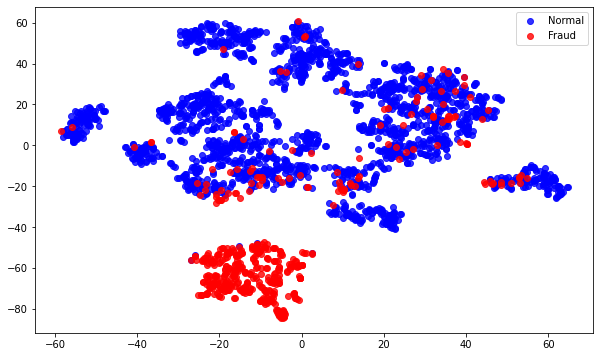

<IPython.core.display.Javascript object>

In [ ]:
# plotting the TSNE function again to visualize the latent data

dimensionality_plot(encoded_X, encoded_y)

In [ ]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# splitting the encoded data
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(
    encoded_X, encoded_y, test_size=0.25
)

print(
    f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}"
)
print(
    f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}"
)

Encoded train data X: (1869, 12), Y: (1869,), X_test :(623, 12), Y_test: (623,)
Actual train & test data X: (1869, 30), Y: (1869, 30), X_test :(623, 30), Y_test: (623,)


<IPython.core.display.Javascript object>

In [ ]:
# applying support vector classifier on the encoded data

svc_clf = SVC(probability=True)

svc_clf.fit(X_enc_train, y_enc_train)

svc_predictions = svc_clf.predict(X_enc_test)

# y_probability
y_proba = svc_clf.predict_proba(X_enc_test)[:, 1]

# precision recall score
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy of SVC {:.2f}".format(accuracy_score(y_enc_test, svc_predictions)))
print("==============================================================")

print(f"ROC-AUC Score: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("==============================================================")

print(f"Average Precision-Recall Score: {average_precision:.2f}")
print("==============================================================")

print(
    "\nClassification report \n {0}".format(
        classification_report(y_enc_test, svc_predictions)
    )
)

Accuracy of SVC 0.95
ROC-AUC Score: 0.96
Average Precision-Recall Score: 0.93

Classification report 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       492
         1.0       1.00      0.78      0.88       131

    accuracy                           0.95       623
   macro avg       0.97      0.89      0.92       623
weighted avg       0.96      0.95      0.95       623



<IPython.core.display.Javascript object>

In [ ]:
# applying logistic regression model on the encoded data

lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

predictions = lr_clf.predict(X_enc_test)

# y_probability
y_proba = lr_clf.predict_proba(X_enc_test)[:, 1]

# precision recall score
average_precision = average_precision_score(y_enc_test, y_proba)

print("Accuracy score is : {:.2f}".format(accuracy_score(y_enc_test, predictions)))
print("==============================================================")

print(f"ROC-AUC Score: {roc_auc_score(y_enc_test, y_proba):.2f}")
print("==============================================================")

print(f"Average Precision-Recall Score: {average_precision:.2f}")
print("==============================================================")

print(
    "\nClassification report \n {0}".format(
        classification_report(y_enc_test, predictions)
    )
)

Accuracy score is : 0.95
ROC-AUC Score: 0.94
Average Precision-Recall Score: 0.90

Classification report 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       492
         1.0       0.96      0.78      0.86       131

    accuracy                           0.95       623
   macro avg       0.95      0.89      0.91       623
weighted avg       0.95      0.95      0.94       623



<IPython.core.display.Javascript object>

## 4. CNN - Convolution Neural Network

In [ ]:
print(X.shape)
print(y.shape)

(2492, 30)
(2492,)


<IPython.core.display.Javascript object>

In [ ]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train Shape (1869, 30)
X_test Shape (623, 30)
y_train Shape (1869,)
y_test Shape (623,)


<IPython.core.display.Javascript object>

In [ ]:
# changing the shape of the data so that the model can process it
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# verifying the changed shape
X_train.shape, X_test.shape

((1869, 30, 1), (623, 30, 1))

<IPython.core.display.Javascript object>

In [ ]:
# Constructing the model
model = Sequential()

model.add(
    Conv1D(filters=32, kernel_size=2, activation="relu", input_shape=X_train[0].shape)
)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)           

<IPython.core.display.Javascript object>

In [ ]:
# Compiling the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC()],
)

# fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
59/59 [==============================] - 9s 17ms/step - loss: 0.2553 - accuracy: 0.9385 - auc: 0.9474 - val_loss: 0.3978 - val_accuracy: 0.9149 - val_auc: 0.9764
Epoch 2/50
59/59 [==============================] - 1s 9ms/step - loss: 0.1220 - accuracy: 0.9679 - auc: 0.9718 - val_loss: 0.3309 - val_accuracy: 0.9743 - val_auc: 0.9815
Epoch 3/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0912 - accuracy: 0.9770 - auc: 0.9863 - val_loss: 0.3506 - val_accuracy: 0.9567 - val_auc: 0.9799
Epoch 4/50
59/59 [==============================] - 1s 9ms/step - loss: 0.1035 - accuracy: 0.9722 - auc: 0.9764 - val_loss: 0.2418 - val_accuracy: 0.9615 - val_auc: 0.9791
Epoch 5/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0942 - accuracy: 0.9732 - auc: 0.9808 - val_loss: 0.2187 - val_accuracy: 0.9599 - val_auc: 0.9835
Epoch 6/50
59/59 [==============================] - 1s 9ms/step - loss: 0.0764 - accuracy: 0.9743 - auc: 0.9907 - val_loss: 0.1485 - val_ac

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Loss Curves')

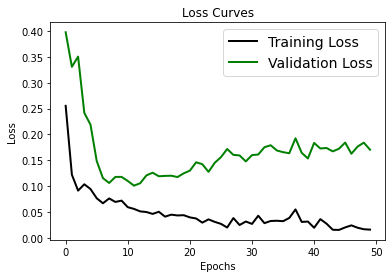

<IPython.core.display.Javascript object>

In [ ]:
# Loss curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "black", linewidth=2.0)
plt.plot(history.history["val_loss"], "green", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

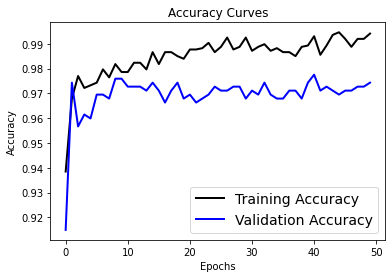

<IPython.core.display.Javascript object>

In [ ]:
# Accuracy curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["accuracy"], "black", linewidth=2.0)
plt.plot(history.history["val_accuracy"], "blue", linewidth=2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy Curves", fontsize=12)

Text(0.5, 1.0, 'AUC Curves')

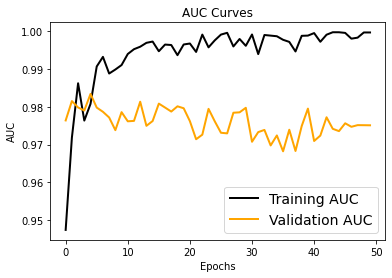

<IPython.core.display.Javascript object>

In [ ]:
# AUC curve

plt.figure(figsize=[6, 4])
plt.plot(history.history["auc"], "black", linewidth=2.0)
plt.plot(history.history["val_auc"], "orange", linewidth=2.0)
plt.legend(["Training AUC", "Validation AUC"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("AUC", fontsize=10)
plt.title("AUC Curves", fontsize=12)

In [ ]:
print("Average AUC Score: ", np.mean(history.history["val_auc"]))

Average AUC Score:  0.9760269379615784


<IPython.core.display.Javascript object>